In [1]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats
import csv

In [2]:
import scipy as sp

In [3]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
#fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/cellxgene/clusteredcellxgene.h5ad"
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/cellxgene/anderson_ti_freeze003-cellxgene.h5ad"
adata=sc.read(fpath)

In [95]:
adata.obsm['X_umap']=adata.obsm['umap']

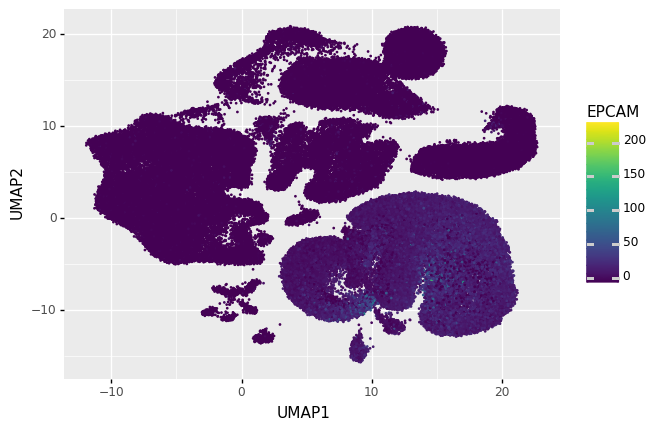

<ggplot: (8791780619093)>

In [96]:
df1=pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
#df1.loc[:,'celltype_category']= adata.obs['celltype_category'].astype('category')
#df1.loc[:,'cell_type']= adata.obs['cell_type'].astype('category')
#df1.loc[:,'celltype_label']= adata.obs['celltype_label']
df1.loc[:,'EPCAM']=np.array(adata[:,adata.var['gene_symbols'].isin(['EPCAM'])].X.todense())
#df1.loc[:,'disease_status']= adata.obs['disease_status'].astype('category')

p = plt9.ggplot(df1, plt9.aes(x='UMAP1', y='UMAP2', color='EPCAM'))
p = p + plt9.geom_point(size = 0.1) #+ plt9.scale_color_manual(values=palette)
#p = p + plt9.theme_void() + plt9.theme(legend_title = plt9.element_blank(), legend_text = plt9.element_blank()) 
p

In [97]:
adata.X = np.log1p(adata.X).copy()

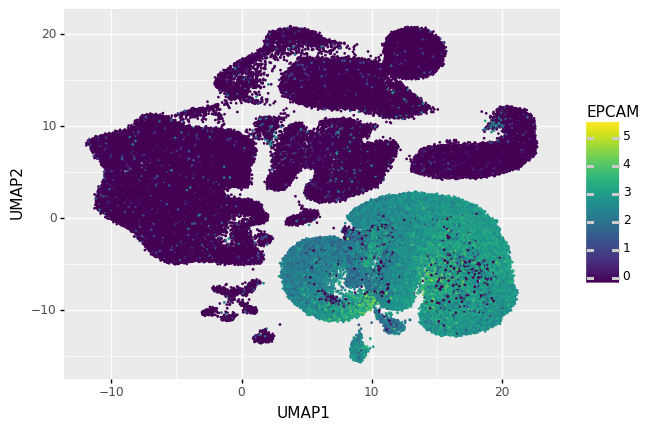

<ggplot: (8791797760069)>

In [98]:
df1=pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
#df1.loc[:,'celltype_category']= adata.obs['celltype_category'].astype('category')
#df1.loc[:,'cell_type']= adata.obs['cell_type'].astype('category')
#df1.loc[:,'celltype_label']= adata.obs['celltype_label']
df1.loc[:,'EPCAM']=np.array(adata[:,adata.var['gene_symbols'].isin(['EPCAM'])].X.todense())
#df1.loc[:,'disease_status']= adata.obs['disease_status'].astype('category')

p = plt9.ggplot(df1, plt9.aes(x='UMAP1', y='UMAP2', color='EPCAM'))
p = p + plt9.geom_point(size = 0.1) #+ plt9.scale_color_manual(values=palette)
#p = p + plt9.theme_void() + plt9.theme(legend_title = plt9.element_blank(), legend_text = plt9.element_blank()) 
p

In [111]:
df=adata.obs.copy()

In [112]:
np.unique(df.celltype_label)

array(['B cell', 'B cell activated',
       'B cell germinal centre/plasmablasts', 'B cell memory (1)',
       'B cell memory (2)', 'B cell naïve', 'B cell plasma IgA CD38+',
       'B cell plasma IgA CD38++', 'B cell plasma IgA CD38+++',
       'Dendritic cell', 'Endocrine cell', 'Endothelial cell',
       'Enterocyte middle villus (1)', 'Enterocyte middle villus (2)',
       'Enterocyte precursor crypt OLFM4+ KRT20++',
       'Enterocyte progenitor crypt OLFM4++ KRT20+ (1)',
       'Enterocyte progenitor crypt OLFM4++ KRT20+ (2)',
       'Enterocyte top villus', 'Enterocytes BEST4',
       'Fibroblast/Myofibroblasts', 'Goblet cell crypt MKI67+',
       'Goblet cell middle villus', 'Goblet cell top villus',
       'ILC1 CD3D- NCAM1+', 'ILC3 CD3D- IL23R+', 'Mac resident IL10RA+',
       'Mac resident IL10RA-', 'Mast', 'MoMac IL10RA+', 'MoMac IL10RA-',
       'Monocytes', 'Paneth cell', 'Pericytes', 'Smooth muscle cell',
       'Stem cell LGR5+', 'Stem cell MKI67+ (1)', 'Stem cell MKI67

In [113]:
df['celltype_label'].replace('T cell CD4 naïve', 'T cell CD4 naive', inplace=True)
np.unique(df.celltype_label)

array(['B cell', 'B cell activated',
       'B cell germinal centre/plasmablasts', 'B cell memory (1)',
       'B cell memory (2)', 'B cell naïve', 'B cell plasma IgA CD38+',
       'B cell plasma IgA CD38++', 'B cell plasma IgA CD38+++',
       'Dendritic cell', 'Endocrine cell', 'Endothelial cell',
       'Enterocyte middle villus (1)', 'Enterocyte middle villus (2)',
       'Enterocyte precursor crypt OLFM4+ KRT20++',
       'Enterocyte progenitor crypt OLFM4++ KRT20+ (1)',
       'Enterocyte progenitor crypt OLFM4++ KRT20+ (2)',
       'Enterocyte top villus', 'Enterocytes BEST4',
       'Fibroblast/Myofibroblasts', 'Goblet cell crypt MKI67+',
       'Goblet cell middle villus', 'Goblet cell top villus',
       'ILC1 CD3D- NCAM1+', 'ILC3 CD3D- IL23R+', 'Mac resident IL10RA+',
       'Mac resident IL10RA-', 'Mast', 'MoMac IL10RA+', 'MoMac IL10RA-',
       'Monocytes', 'Paneth cell', 'Pericytes', 'Smooth muscle cell',
       'Stem cell LGR5+', 'Stem cell MKI67+ (1)', 'Stem cell MKI67

In [114]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/clean_annotation/data-clean_annotation-full.csv"
df5=pd.read_table(fpath, sep=',')
df5=df5[["category", "label_retired", "label", "label__machine"]]
df5.rename(columns={"label_retired": "celltype_label"}, inplace=True)
df5

,category,celltype_label,label,label__machine
0,T Cell,T cell CD8 (1),T cell CD8+ tissue-resident,T_cell_CD8plus_tissueminusresident
1,B Cell,B cell naive,B cell naive,B_cell_naive
2,B Cell plasma,B cell plasma IgA CD38++,B cell plasma IgA (2),B_cell_plasma_IgA_2
3,B Cell,B cell memory (1),B cell memory (1),B_cell_memory_1
4,T Cell,T cell CD4 CD40LG+ (1),T cell CD4+ memory,T_cell_CD4plus_memory
5,T Cell,T cell CD4 naive,T cell CD4 naive,T_cell_CD4_naive
6,T Cell,T cell CD4 CD40LG+ (2),T cell CD4+ PASK+ CCR7+,T_cell_CD4plus_PASKplus_CCR7plus
7,Stem cells,Stem cell LGR5+,Stem cell LGR5+,Stem_cell_LGR5plus
8,B Cell,B cell memory (2),B cell memory (2),B_cell_memory_2
9,T Cell,T cell CD4 CD40LG+ (3),T cell CD4+ CXCR6+ memory,T_cell_CD4plus_CXCR6plus_memory


In [116]:
df6=pd.merge(df,df5, on="celltype_label", how="left")

In [119]:
#df6=df6.drop(columns=['label_retired'])
df6=df6.drop(columns=['celltype_category'])
df6=df6.drop(columns=['celltype_label'])
df6.rename(columns={"label": "celltype_label"}, inplace=True)
df6.rename(columns={"category": "celltype_category"}, inplace=True)
df6

,sex,age,disease_status,inflammation_status,smoking_status,late_early_ratio,enzyme_lot,season_sample_collected,late_early_ratio_float,early_late_ratio,...,pct_counts_gene_group__ribo_protein,S_score,G2M_score,phase,hallmark_apoptosis,hallmark_inflammatory_response,inflammation_signature__smilliecs_31348891,celltype_category,celltype_label,label__machine
0,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,22.024000,0.511283,1.361221,G2M,0.153053,-0.116009,-0.211748,Stem cells,Stem cell MKI67+ (1),Stem_cell_MKI67plus_1
1,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,12.024845,0.013993,3.057641,G2M,0.114743,-0.046425,-0.162518,Stem cells,Stem cell MKI67+ (1),Stem_cell_MKI67plus_1
2,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,19.058928,0.276897,-0.152909,S,0.218491,-0.092669,-0.223325,Stem cells,Stem cell MKI67+ (2),Stem_cell_MKI67plus_2
3,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,22.526514,0.469044,2.093601,G2M,0.222737,-0.139489,-0.215248,Stem cells,Stem cell MKI67+ (1),Stem_cell_MKI67plus_1
4,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,17.293301,-0.116789,0.699139,G2M,0.285866,-0.030247,-0.186486,Stem cells,Stem cell MKI67+ (2),Stem_cell_MKI67plus_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141592,F,63.0,Healthy,uninflamed,no,1:0,SLCB6672,summer,0.000,0:1,...,30.169243,-0.218456,-0.218065,G1,-0.002592,-0.048417,0.028439,B Cell,B cell,B_cell
141593,F,63.0,Healthy,uninflamed,no,1:0,SLCB6672,summer,0.000,0:1,...,32.851986,0.031625,-0.098144,S,0.081637,-0.042892,-0.092835,T Cell,T cell CD8+ GZMK+,T_cell_CD8plus_GZMKplus
141594,F,63.0,Healthy,uninflamed,no,1:0,SLCB6672,summer,0.000,0:1,...,33.804913,0.188777,-0.040397,S,0.037965,0.147729,0.168578,T Cell,T cell CD8+ GZMK+,T_cell_CD8plus_GZMKplus
141595,F,63.0,Healthy,uninflamed,no,1:0,SLCB6672,summer,0.000,0:1,...,2.517703,-0.266065,-0.124922,G1,0.119029,0.013135,-0.118672,T Cell,T cell CD4 naive,T_cell_CD4_naive


In [120]:
# Generate list of helper IDs
df3=df6[['experiment_id', "disease_status"]].drop_duplicates().reset_index().drop(columns="index")
df3['disease_status']=df3['disease_status'].replace({"Crohn's disease": "CD", "Healthy": 'H'})
id_count = {"CD":0, 'H':0}
list_of_ids = []
for index, row in df3.iterrows():
    if row['disease_status'] in id_count:
        key = row['disease_status']
        list_of_ids.append(f"{key}{id_count[key] + 1}")
        id_count[key] = id_count[key] + 1
df3['sample_id'] = list_of_ids
df3=df3.drop(columns="disease_status")

In [121]:
df6=df6.merge(df3, left_on='experiment_id', right_on='experiment_id').copy()
df6=df6.drop(columns=['experiment_id'])
df6.rename(columns={"sample_id": "experiment_id"}, inplace=True)
df6=df6.set_index(np.unique(df.index))

In [122]:
adata.obs=df6.copy()

In [123]:
adata.obs

,sex,age,disease_status,inflammation_status,smoking_status,late_early_ratio,enzyme_lot,season_sample_collected,late_early_ratio_float,early_late_ratio,...,S_score,G2M_score,phase,hallmark_apoptosis,hallmark_inflammatory_response,inflammation_signature__smilliecs_31348891,celltype_category,celltype_label,label__machine,experiment_id
AAACCCAAGAACGTGC-1-OTARscRNA9294504,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,0.511283,1.361221,G2M,0.153053,-0.116009,-0.211748,Stem cells,Stem cell MKI67+ (1),Stem_cell_MKI67plus_1,CD1
AAACCCAAGAAGATCT-1-OTARscRNA8356302,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,0.013993,3.057641,G2M,0.114743,-0.046425,-0.162518,Stem cells,Stem cell MKI67+ (1),Stem_cell_MKI67plus_1,CD1
AAACCCAAGACAACTA-1-OTARscRNA8356782,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,0.276897,-0.152909,S,0.218491,-0.092669,-0.223325,Stem cells,Stem cell MKI67+ (2),Stem_cell_MKI67plus_2,CD1
AAACCCAAGACCAACG-1-5892STDY8356878,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,0.469044,2.093601,G2M,0.222737,-0.139489,-0.215248,Stem cells,Stem cell MKI67+ (1),Stem_cell_MKI67plus_1,CD1
AAACCCAAGACCAAGC-1-OTARscRNA8356110,M,36.0,Crohn's disease,mild,no,28:1,SLBZ4589,summer,0.036,1:28,...,-0.116789,0.699139,G2M,0.285866,-0.030247,-0.186486,Stem cells,Stem cell MKI67+ (2),Stem_cell_MKI67plus_2,CD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCTCTCTTC-1-5892STDY8644304,F,63.0,Healthy,uninflamed,no,1:0,SLCB6672,summer,0.000,0:1,...,-0.218456,-0.218065,G1,-0.002592,-0.048417,0.028439,B Cell,B cell,B_cell,H26
TTTGTTGTCTCTCTTC-1-5892STDY8644400,F,63.0,Healthy,uninflamed,no,1:0,SLCB6672,summer,0.000,0:1,...,0.031625,-0.098144,S,0.081637,-0.042892,-0.092835,T Cell,T cell CD8+ GZMK+,T_cell_CD8plus_GZMKplus,H26
TTTGTTGTCTGATTCT-1-5892STDY8644401,F,63.0,Healthy,uninflamed,no,1:0,SLCB6672,summer,0.000,0:1,...,0.188777,-0.040397,S,0.037965,0.147729,0.168578,T Cell,T cell CD8+ GZMK+,T_cell_CD8plus_GZMKplus,H26
TTTGTTGTCTTGGTGA-1-5892STDY8357262,F,63.0,Healthy,uninflamed,no,1:0,SLCB6672,summer,0.000,0:1,...,-0.266065,-0.124922,G1,0.119029,0.013135,-0.118672,T Cell,T cell CD4 naive,T_cell_CD4_naive,H26


In [124]:
adata.write(
        'anderson_ti_freeze003-cellxgene-updated-v2.h5ad',
        compression='gzip',
        compression_opts=9  # takes ages, but we want a small file for system
)

In [127]:
adata.write(
        '/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/zenodo/Discovery_cohort-CellAtlas.h5ad',
        compression='gzip',
        compression_opts=9  # takes ages, but we want a small file for system
)

In [ ]:
"/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/cellxgene/anderson_ti_freeze003-cellxgene-updated-v2.h5ad"